In [1]:
# library importing
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# classification

In [2]:
iris=load_iris() # load iris built-in dataset 

In [3]:
x=iris.data
y=iris.target

In [4]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0) # split data into train and test

In [5]:
# import KNN classifier library
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,35)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(scores[k])

In [7]:
scores_list

[0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9210526315789473,
 0.8947368421052632,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9210526315789473,
 0.9473684210526315]

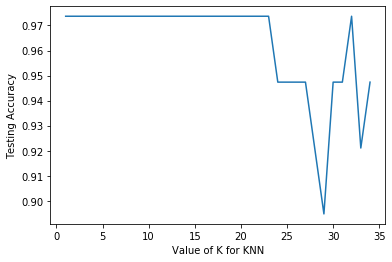

In [20]:
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

##  K values with 2 to 22 has the same accuracy which is 96.66, so we can use any one value from that, i choose K as 5 and train the model with full training data

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[3,3,5,2],
         [1,2.5,1,1]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


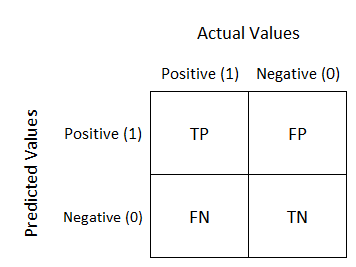

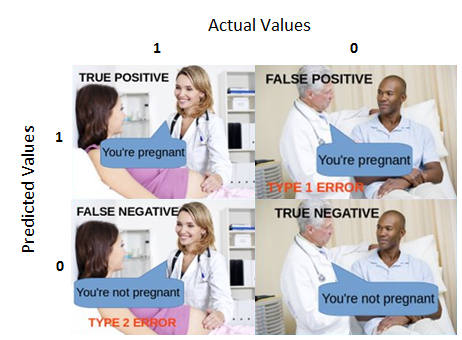

- False Positive: (Type 1 Error)
    Interpretation: You predicted positive and it’s false.
- False Negative: (Type 2 Error)
    Interpretation: You predicted negative and it’s false.

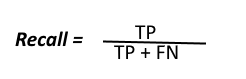
Out of all the positive classes, how much we predicted correctly.

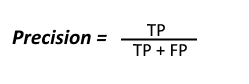
Out of all the positive classes we have predicted correctly, how many are actually positive.

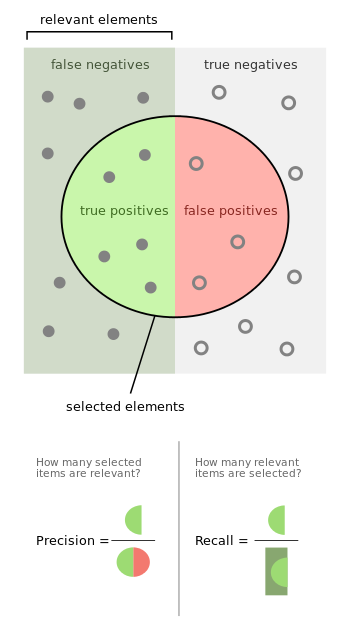

 - Precision: It is implied as the measure of the correctly identified positive cases from all the predicted positive cases.
 
 - Recall: It is the measure of the correctly identified positive cases from all the actual positive cases.

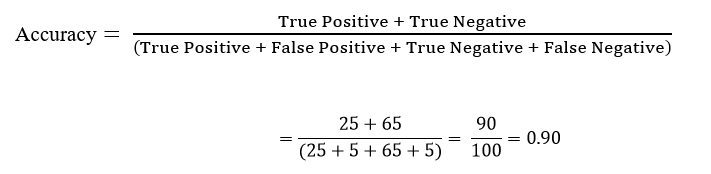

  - Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial
  - In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on

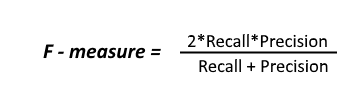
#### It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

#### Model with a P of 0.9 and R of 0.4.

    So the AM = (0.9+0.4)/2=0.65

    GM = sqrt(0.9 * 0.4)=0.6

    HM = 2*(0.9*0.4)/(0.9+0.4)= 0.55

    It is clear that compared to AM and GM, HM penalizes model the most when even one of Precision and Recall is low.

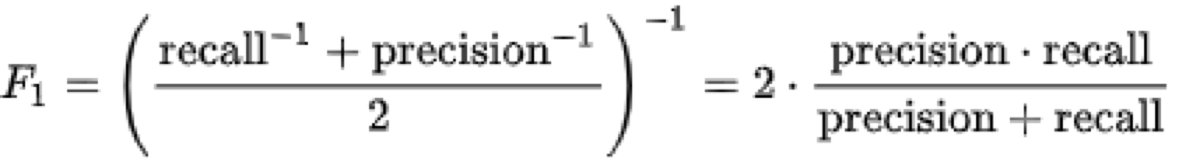

The harmonic mean is defined as the reciprocal of the arithmetic mean of the reciprocals. Because of that, the result is not sensitive to extremely large values.

# Regression

In [24]:
reg_data=pd.read_csv("Salary_Data.csv")
reg_data.head()

,YearsExperience,Salary
0,1.1,0.0
1,1.3,1.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [26]:
x=reg_data["YearsExperience"].values
y=reg_data["Salary"].values

In [27]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0) # split data into train and test

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
k_range = range(1,20)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train.reshape(-1,1),y_train)
        y_pred=knn.predict(X_test.reshape(-1,1))
        scores[k] = metrics.r2_score(y_test,y_pred)
        scores_list.append(metrics.r2_score(y_test,y_pred))

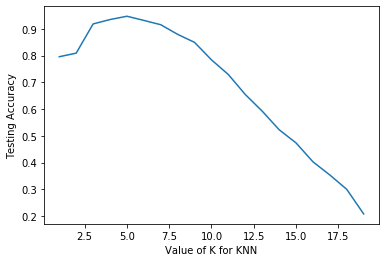

In [47]:
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [48]:
knn_reg=KNeighborsRegressor(n_neighbors=5).fit(X_train.reshape(-1, 1),y_train)

In [49]:
knn_pred=knn_reg.predict(X_test.reshape(-1, 1))

In [50]:
knn_pred

array([ 28011.8, 108168.2,  59528. ,  58829.4, 108168.2, 108168.2,
       108168.2,  58829.4])

In [51]:
r2_score(y_test,knn_pred)

0.9470123706363164